# 1. Import Libraries

In [1]:
import numpy as np
import statistics as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Upload the dataset
Downloading the dataset from 
https://archive.ics.uci.edu/dataset/162/forest+fires

In [2]:
df = pd.read_csv("forestfires.csv")

# 3.Understanding the dataset

In [3]:
df.head(50)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


# 4.Data Cleaning and Preparation

In [4]:
# Decribe the variables as numerical or categorical.
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [5]:
#The info() method prints information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
# Check missing values
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [7]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [8]:
# Delete all the duplicate data
df.drop_duplicates()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Text(0.5, 1.0, 'Worst month')

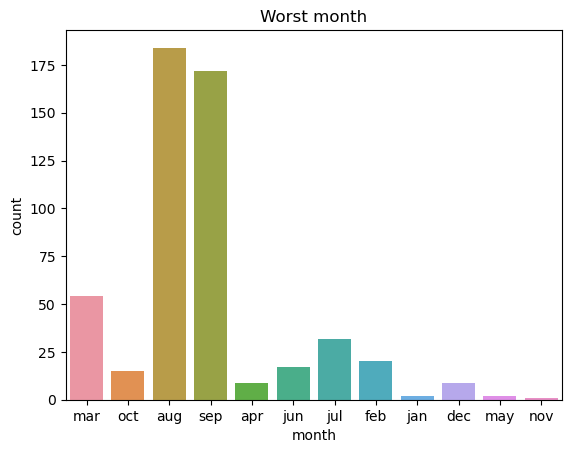

In [9]:
sns.countplot(x='month',data = df)
plt.title('Worst month')

In [10]:
# Delete rows with missing values.

df = df.dropna()
print(df.to_string())

     X  Y month  day  FFMC    DMC     DC   ISI  temp   RH  wind  rain     area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2   51   6.7   0.0     0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0   33   0.9   0.0     0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6   33   1.3   0.0     0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3   97   4.0   0.2     0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4   99   1.8   0.0     0.00
5    8  6   aug  sun  92.3   85.3  488.0  14.7  22.2   29   5.4   0.0     0.00
6    8  6   aug  mon  92.3   88.9  495.6   8.5  24.1   27   3.1   0.0     0.00
7    8  6   aug  mon  91.5  145.4  608.2  10.7   8.0   86   2.2   0.0     0.00
8    8  6   sep  tue  91.0  129.5  692.6   7.0  13.1   63   5.4   0.0     0.00
9    7  5   sep  sat  92.5   88.0  698.6   7.1  22.8   40   4.0   0.0     0.00
10   7  5   sep  sat  92.5   88.0  698.6   7.1  17.8   51   7.2   0.0     0.00
11   7  5   sep  sat  92.8   73.2  713.0  22.6  19.3

In [11]:
df.shape

(517, 13)

In [12]:
# With .unique() you can see the depth of the columns.
df["month"].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [13]:
# Use function map to change words for numbers.

map = {'jan': 1, 'feb': 2, 'mar': 3,'apr': 4, 'may': 5, 'jun': 6,
      'jul': 7, 'aug': 8, 'sep': 9,'oct': 10, 'nov': 11, 'dec': 12}

df['month'] = df['month'].map(map)

In [14]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [15]:
df["day"].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [16]:
map = {'mon': 1, 'tue': 2, 'wed': 3,'thu': 4, 'fri': 5, 'sat': 6,
      'sun': 7}

df['day'] = df['day'].map(map)

In [17]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [18]:
df['month'] = df['month'].astype('int64')
df['day'] = df['day'].astype('int64')

In [19]:
df.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [20]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## 5.Summary Statistics
# 5.1. Create Functions

# Mean:
The mean is usually referred to as 'the average'. The mean is the sum of all the values in the data divided by the total number of values in the data.

In [21]:
def calc_mean(variable):
    if len(variable) == 0:
        return None
    mean = sum(variable) / len(variable)
    return mean

In [22]:
calc_mean(df["temp"])

18.88916827852998

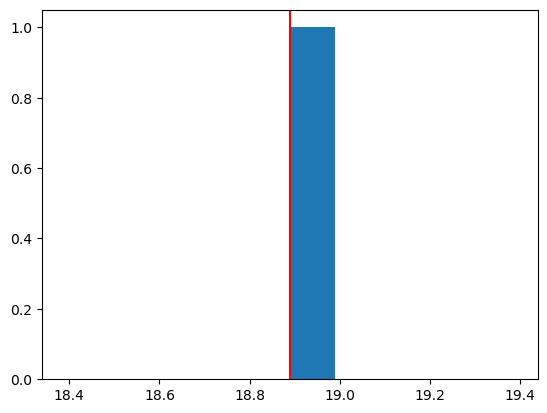

mean: 18.88916827852998


In [23]:
mean = calc_mean(df["temp"])

plt.hist(mean);
plt.axvline(x=mean, color='r', linestyle='-')
plt.show()

print('mean: '+ str(mean))

# Median

In [24]:
def calc_median(variable):
    if len(variable) == 0:
        return None
    variable = variable.sort_values(ignore_index = True)
    n = len(variable)
    if n % 2 == 0:
        mid1 = variable[n // 2 - 1]
        mid2 = variable[n // 2]
        median = ((mid1 + mid2) / 2)
        return median
    else:
        median = variable[n // 2]
        return median

In [25]:
calc_median(df['temp'])

19.3

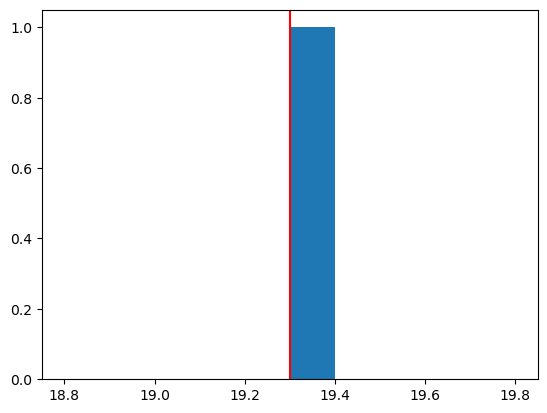

median: 19.3


In [26]:
median = calc_median(df['temp'])

plt.hist(median);
plt.axvline(x=median, color='r', linestyle='-')
plt.show()

print('median: '+ str(median))

# Mode

In [27]:
def calc_mode(variable):
    if len(variable) == 0:
        return None
    num_freq = {}
    for num in variable:
        if num in num_freq:
            num_freq[num] += 1
        else:
            num_freq[num] = 1
    max_count = max(num_freq.values())
    mode = [num for num, count in num_freq.items() if count == max_count]
    if len(mode) == len(variable):
        return "No mode available"
    return mode

In [28]:
calc_mode(df["temp"])

[19.6, 17.4]

# Standard Deviation

In [29]:
std_deviation_numpy = np.std(df)
print("Standard deviation using numpy:", std_deviation_numpy)

Standard deviation using numpy: X          2.311539
Y          1.228710
month      2.273788
day        2.070923
FFMC       5.514770
DMC       63.984512
DC       247.826166
ISI        4.555065
temp       5.801007
RH        16.301681
wind       1.789919
rain       0.295673
area      63.594226
dtype: float64


C:\Users\lorra\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


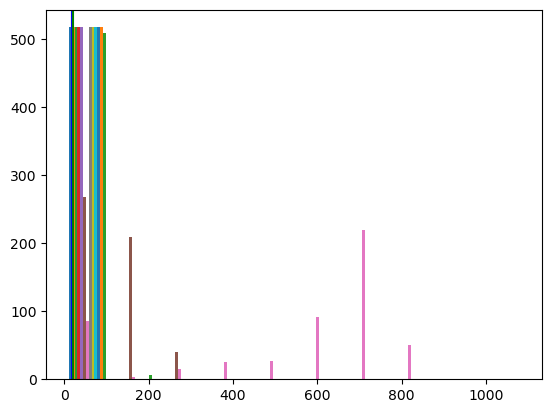

mean: 18.88916827852998
median: 19.3
mode: [19.6, 17.4]


In [30]:
mean = calc_mean(df["temp"])
median = calc_median(df["temp"])
mode = calc_mode(df["temp"])

plt.hist(df);
plt.axvline(x=mean, color='r', linestyle='-')
plt.axvline(x=median, color='b', linestyle='-')
plt.axvline(x=mode[0], color='g', linestyle='-')
plt.show()

print('mean: '+ str(mean))
print('median: '+ str(median))
print('mode: '+ str(mode))

## 6.Modeling the Dataset
# 6.1.Linear Regression

In [31]:
df1 = df[["X","Y","temp","wind","area"]]

In [32]:
Y = df1.X
X = df1.drop('X', axis=1)

In [33]:
df1 = df1.dropna(axis=0)

In [34]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

# Initialize cross-validation
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [35]:
# Show the rows and columns
X.shape, Y.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((517, 4), (517,), (413, 4), (104, 4), (413,), (104,))

In [36]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [37]:
# Train the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
lr = LinearRegression().fit(x_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  0.26463849116818805
STD:  0.14141086549111415




In [38]:
regression_model = LinearRegression()

# Fitting the model
regression_model.fit(x_train,y_train)

#Using the Linear Regression to predict the datas of test
y_regression = regression_model.predict(x_test)

In [39]:
# Calculate the predicted values
y_pred = lr.predict(x_test)
y_pred
print(y_pred)

[3.39947674 5.2784836  6.36757468 4.38744447 6.35686289 5.24221647
 3.25522617 4.30176946 6.41937455 4.39227082 4.30563931 4.45326858
 3.2121562  4.38915383 5.45660514 2.3106464  3.26840741 3.24973262
 4.4255775  3.1926353  4.36214764 3.21552044 4.35804574 2.2926949
 3.38683011 4.35963262 6.24636593 5.26476384 5.23158649 4.30179666
 6.38924894 4.22431991 3.30667788 6.19364241 6.26020439 6.74199706
 5.37601439 4.35688707 7.68686986 6.16529296 4.34873474 4.27241873
 4.29179988 5.30440123 4.2370999  4.26607309 6.22401412 4.30425425
 2.25701543 4.27609869 6.38103438 4.35817917 6.42253932 3.29976302
 3.3487719  4.33897648 9.56195084 5.29762508 4.31637575 6.4495151
 5.33771882 5.23288907 5.20973143 4.33536923 4.40840799 2.73138121
 5.29088454 5.2441335  9.4513597  4.33872159 2.18784535 4.35172073
 5.28122166 6.25049146 4.28500198 5.41144625 4.32560003 2.23906045
 4.32671135 4.40055625 5.33735921 4.29039584 4.32602917 3.44518789
 4.28719142 4.24850602 4.29416291 3.22605967 4.20051966 6.384762

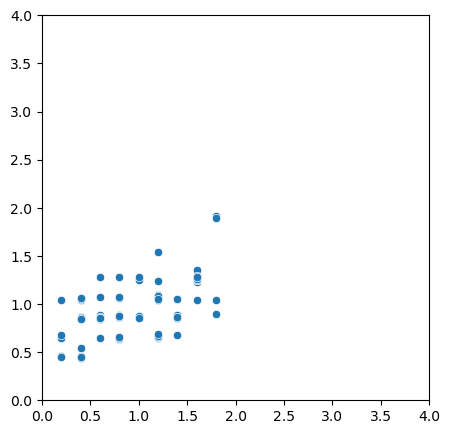

In [40]:
# Using the following codes, we can visualize the predicted points X real.

plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test.values/5,y=y_regression/5)
plt.ylim(0,4)
plt.xlim(0,4)
plt.show()

In [41]:
# To check if the chosen model is good, we need to eliminate the errors:
# Evaluating Mean Squared Error
from sklearn.metrics import mean_squared_error
squared_error_regression = mean_squared_error(y_test,y_regression)
print(squared_error_regression)

3.7498993905075317


In [42]:
# Evaluating R2 score
from sklearn.metrics import r2_score
r2_regression = r2_score(y_test,y_regression)
print(r2_regression)

0.2692087962571268


In [43]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
213,7,3.399477
435,2,5.278484
343,8,6.367575
230,4,4.387444
171,8,6.356863
15,6,5.242216
162,6,3.255226
489,4,4.301769
381,8,6.419375
96,3,4.392271


In [44]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6398967350241334
Mean Squared Error: 3.7498993905075317
Root Mean Squared Error: 1.9364656956702155


array([[<Axes: title={'center': 'Y'}>, <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'area'}>]], dtype=object)

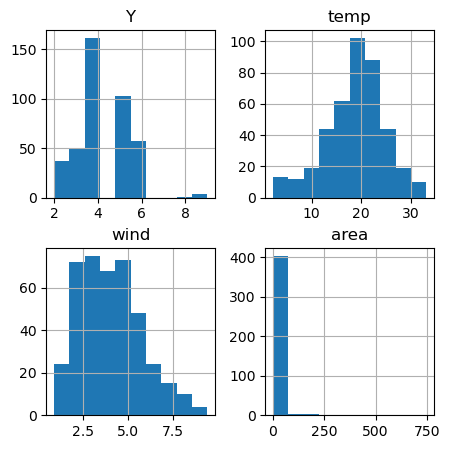

In [45]:
x_train.hist(figsize=(5,5))

<Axes: >

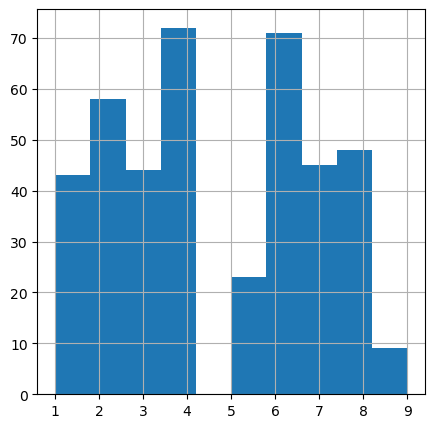

In [46]:
y_train.hist(figsize=(5,5))

## Task 2 - Probability (Discrete):
Discrete is Numerical variable with finite options.

A) What is the probability of rolling exactly two 6s in five rolls of a fair die?

In [47]:
from scipy.stats import binom

# Five rolls of a fair die:
n = 5

# Number of rolling:
k = 2

# Probability
p = 1 / 6

# Calculating the probability:
probability = binom.pmf(k, n, p)

print("The probability of rolling exactly two 6s in five rolls of a fair die:", probability)

The probability of rolling exactly two 6s in five rolls of a fair die: 0.16075102880658423


B) The number of industrial injuries on average per working week in a factory is 0.75. Assuming that the distribution of injuries follows a Poisson distribution, find the probability that in a particular week there will be no more than two accidents.
Stating the answers alone here is not sufficient - you should show clearly how you found your answer, justify any decisions made, and include plots where appropriate.

To solve the exercise before we need to use the Poisson Distribution:
P(X=k)= (e^−λ)*(λ^k)/k!



In [48]:
#λ=0.75
lambd = 0.75

# Function to calculate Poisson probability
def poisson_prob(k):
    return np.exp(-lambd) * (lambd ** k) / np.math.factorial(k)

# Calculating probabilities for 0, 1, and 2 accidents
prob_0 = poisson_prob(0)
prob_1 = poisson_prob(1)
prob_2 = poisson_prob(2)

# Calculating the probability of at most 2 accidents
prob_at_most_2 = prob_0 + prob_1 + prob_2

print("Probability of at most 2 accidents per week:", prob_at_most_2)

Probability of at most 2 accidents per week: 0.9594945602551861


C:\Users\lorra\AppData\Local\Temp\ipykernel_11352\4267457177.py:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.exp(-lambd) * (lambd ** k) / np.math.factorial(k)


C:\Users\lorra\AppData\Local\Temp\ipykernel_11352\4267457177.py:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.exp(-lambd) * (lambd ** k) / np.math.factorial(k)


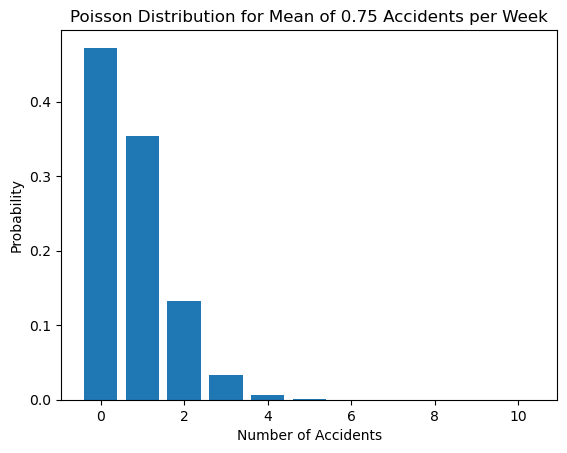

In [49]:
# Plotting the Poisson distribution for k from 0 to 10
k_values = np.arange(0, 11)
poisson_probs = [poisson_prob(k) for k in k_values]

plt.bar(k_values, poisson_probs)
plt.xlabel('Number of Accidents')
plt.ylabel('Probability')
plt.title('Poisson Distribution for Mean of 0.75 Accidents per Week')
plt.show()

## Task 3 - Probability (Continuous):
Continuous is Numerical variable with infinite options.

The time a person spends at Dublin Zoo is Normally distributed with a mean of 90 minutes and a
standard deviation of 10 minutes.
Using this distribution, answer the following:
•
If a visitor is selected at random, find the probability that they will spend at most 85 minutes visiting the zoo.

In [50]:
from scipy.stats import norm

# Parameters of the normal distribution
mean = 90  # Mean time spent at Dublin Zoo
std_dev = 10  # Standard deviation of time spent in minutes

# Calculate the probability using the cumulative distribution function (CDF)
probability = norm.cdf(85, loc=mean, scale=std_dev)

print("Probability that a visitor will spend at most 85 minutes at the zoo:", probability)

Probability that a visitor will spend at most 85 minutes at the zoo: 0.3085375387259869


If a visitor is selected at random, find the probability that they will spend at least 100 minutes visiting the zoo.

In [51]:
# We find the complement of spending less than 100 minutes
probability = 1 - norm.cdf(100, loc=mean, scale=std_dev)

print("Probability that a visitor will spend at least 100 minutes at the zoo:", probability)

Probability that a visitor will spend at least 100 minutes at the zoo: 0.15865525393145707


Given that you know that a particular visitor has spent longer than average visiting the Zoo, what is the probability that they have spent more than 100 minutes there?

In [52]:
# Probability of spending more than 100 minutes at the zoo
prob = 1 - norm.cdf(100, loc=mean, scale=std_dev)

# Probability of spending longer than average at the zoo
prob1 = 1 - norm.cdf(mean, loc=mean, scale=std_dev)

# Probability of spending more than 100 minutes given spending longer than average
prob2 = prob / prob1

print("Probability of spending more than 100 minutes given spending longer than average:", 
      prob2)

Probability of spending more than 100 minutes given spending longer than average: 0.31731050786291415
